In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity

### Definitions

Setting $n$ and $p$ for $ER_n(p)$, $ER$ being Erdos-Renyi

In [2]:
def generate_An(n: int, p: float):
    An = np.random.binomial(1, p, size=(n, n))
    np.fill_diagonal(An, val=0)
    An[np.tril_indices(n, k=-1)] = An.T[np.tril_indices(n, k=-1)]

    return An


def generate_Dn(An):
    n = An.shape[0]
    Dn = np.zeros(shape=(n, n))
    degrees = np.matrix(An).sum(axis=1)
    np.fill_diagonal(Dn, degrees)
    Dn = Dn.astype(int)

    return Dn


def generate_Deltan(An, Dn):
    laplacian = Dn - An

    return laplacian


def generate_Ln(An, Dn):
    n = An.shape[0]
    degrees = np.matrix(An).sum(axis=1)
    degrees_inv_sqrt = 1/np.sqrt(degrees)
    Dn_inv_sqrt = np.zeros(shape=(n, n))
    np.fill_diagonal(Dn_inv_sqrt, degrees_inv_sqrt)

    Ln = np.identity(n) - np.matmul(np.matmul(Dn_inv_sqrt,An), Dn_inv_sqrt)

    return Ln


def normalized_An_spectra(An, p):
    n = An.shape[0]
    centered_An = An - p
    normed_centered_An = centered_An * 1/np.sqrt(n * p * (1 - p))
    eigen_normed_An = np.linalg.eigvalsh(normed_centered_An)

    return eigen_normed_An


def normalized_Deltan_spectra(Deltan, p, x_range = np.linspace(-5, 5, 100)):
    n = Deltan.shape[0]
    normed_centered_eigen_Laplacian_n = (np.linalg.eigvalsh(Deltan) - n * p) /(np.sqrt(n * p * (1 -p)))
    Fn_Laplacian = [np.sum(normed_centered_eigen_Laplacian_n <= x)/n for x in x_range]

    return np.diff(Fn_Laplacian)


def normalized_Ln_spectra(Ln, p, x_range = np.linspace(-5, 5, 100)):
    n = Ln.shape[0]
    eigen_Ln = np.linalg.eigvalsh(Ln)
    normed_centered_eigen_Ln = (1 - eigen_Ln) * np.sqrt((n * p))
    Fn_Normed_Laplacian = [np.sum(normed_centered_eigen_Ln <= x)/n for x in x_range]

    return np.diff(Fn_Normed_Laplacian)

In [10]:
n = 10000
lambda_range = np.arange(0.01, 1, 0.01)
x_range = np.linspace(-5, 5, 100)
p_range = lambda_range/n

In [6]:
simulation_results = {}

for p in p_range:
    print("Simulating for p=%s" % p)
    try:
        An = generate_An(n, p)
        Dn = generate_Dn(An)
        laplacian = generate_Deltan(An, Dn)
        Ln = generate_Ln(An, Dn)
        # eigen_normed_An = normalized_An_spectra(An, p)
        # print("lambda(A_n) calculated...")
        # eigen_Ln = np.linalg.eigvalsh(Ln)
        # print("lambda(L_n) calculated...")
        # eigen_Laplacian_n = np.linalg.eigvalsh(laplacian)
        # print("lambda(Delta_n) calculated...")
        # Fn_Laplacian = normalized_Deltan_spectra(laplacian, p)
        # Fn_Normed_Laplacian = normalized_Ln_spectra(Ln, p)
    except np.linalg.LinAlgError:
        print("Simulation failed due to linear algebra error in numpy.")
        continue

    simulation_results[p] = {
        "An": An,
        "Dn": Dn,
        "Deltan": laplacian,
        "Ln": Ln
        # "Fn_Laplacian": Fn_Laplacian,
        # "Fn_Normed_Laplacian": Fn_Normed_Laplacian
    }


# We're not seeing np converge successfully, even with float64, so we move to try in R and then MatLab instead

Simulating for p=0.0001


/var/folders/ww/k1c8g8897872xcq5ddjx8d600000gn/T/ipykernel_85599/1033027579.py:28: RuntimeWarning: divide by zero encountered in divide
  degrees_inv_sqrt = 1/np.sqrt(degrees)
/var/folders/ww/k1c8g8897872xcq5ddjx8d600000gn/T/ipykernel_85599/1033027579.py:32: RuntimeWarning: invalid value encountered in matmul
  Ln = np.identity(n) - np.matmul(np.matmul(Dn_inv_sqrt,An), Dn_inv_sqrt)


Simulating for p=0.0006
Simulating for p=0.0011
Simulating for p=0.0016
Simulating for p=0.0021
Simulating for p=0.0026
Simulating for p=0.0031
Simulating for p=0.0036
Simulating for p=0.0041
Simulating for p=0.0046
Simulating for p=0.0051
Simulating for p=0.0056
Simulating for p=0.0061
Simulating for p=0.0066
Simulating for p=0.0071
Simulating for p=0.0076
Simulating for p=0.0081
Simulating for p=0.0086
Simulating for p=0.0091
Simulating for p=0.0096


In [7]:
sim_result_keys = list(simulation_results.keys())

fig, ax = plt.subplots(figsize=(6, 5))
ax.grid()
ax.set_title("Spectral Distribution of Centered, Normalized $A_N, N=%s$" % n)

for sim_p in simulation_results:
        sim_result_n = simulation_results[sim_p]
        An = sim_result_n['An']
        eigen_normed_An = normalized_An_spectra(An, sim_p)

        ax.hist(eigen_normed_An,
                bins=100,
                histtype='step')

Text(0.5, 0.98, 'Unnormalized/Uncentered Spectral Distributions of Sparse $\\Delta_N$ and $L_N, N=10000, p=0.0041$')

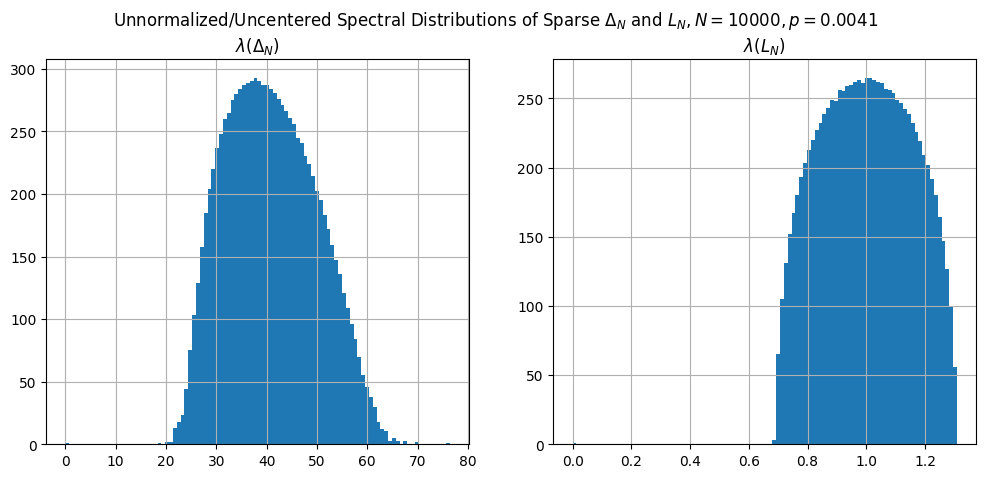

In [13]:
Ln = sim_result_n['Ln']
laplacian = sim_result_n['Deltan']

eigen_Ln = np.linalg.eigvalsh(Ln)
eigen_Laplacian_n = np.linalg.eigvalsh(laplacian)

fig, axs = plt.subplots(figsize=(12, 5), ncols=2)

axs[0].hist(eigen_Laplacian_n,
            bins=100)
axs[0].grid()
axs[0].set_title("$\lambda(\Delta_N$)")

axs[1].hist(eigen_Ln,
            bins=100)
axs[1].grid()
axs[1].set_title("$\lambda(L_N)$")

fig.suptitle("Unnormalized/Uncentered Spectral Distributions of Sparse $\Delta_N$ and $L_N, N=%s, p=%s$" % (n, sim_result_keys[4]))

Text(0.5, 0.98, 'Normalized/Centered Spectral Distributions of Sparse $\\Delta_N$ and $L_N, N=10000, p=0.0041')

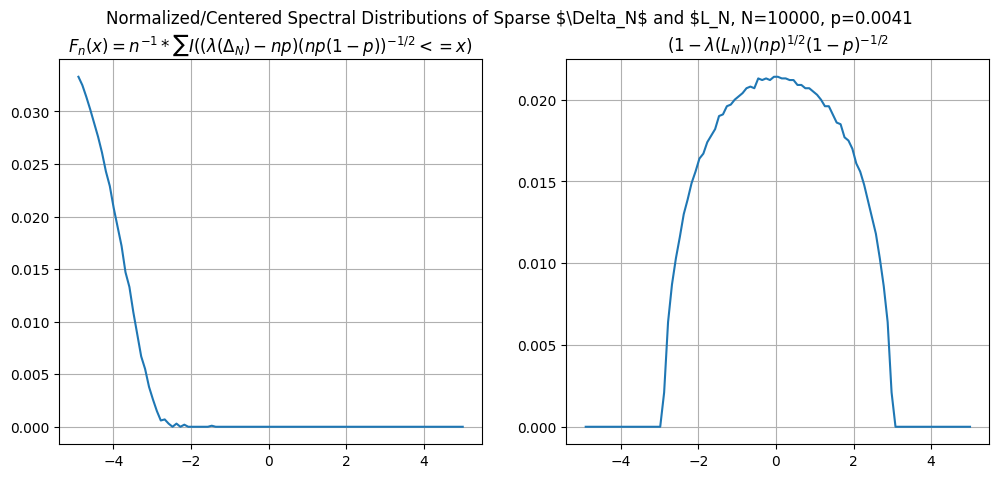

In [14]:
Fn_Laplacian = normalized_Deltan_spectra(laplacian, p)
Fn_Normed_Laplacian = normalized_Ln_spectra(Ln, p)

fig, axs = plt.subplots(figsize=(12, 5), ncols=2)

axs[0].plot(x_range[1:], Fn_Laplacian)
axs[0].grid()
axs[0].set_title("$F_n(x) = n^{-1} * \sum I((\lambda(\Delta_N) - np)(np(1-p))^{-1/2} <= x)$")

axs[1].plot(x_range[1:],
            Fn_Normed_Laplacian)
axs[1].grid()
axs[1].set_title("$(1-\lambda(L_N))(np)^{1/2}(1-p)^{-1/2}$")

fig.suptitle("Normalized/Centered Spectral Distributions of Sparse $\Delta_N$ and $L_N, N=%s, p=%s" % (n, sim_result_keys[4]))